# Solving the n-Queens Problem using Local Search






## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


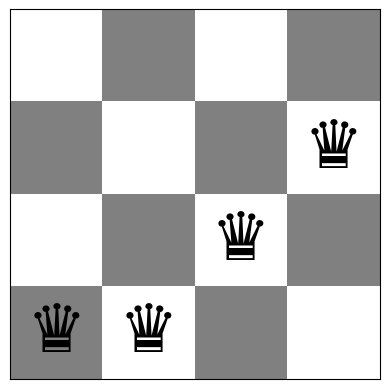

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [19]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


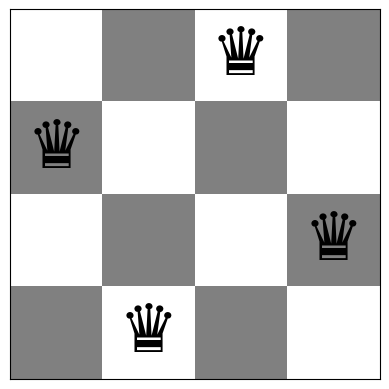

In [20]:
board = [1,3,0,2]
show_board(board)

Board with 0 conflicts.


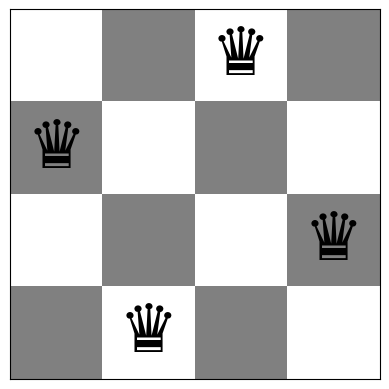

In [21]:
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [22]:
# Code and description go here
def steepest_ascend_hill_climbing_search(board):
    current_board = board.copy()
    n = len(current_board)

    while True:
        current_conflicts = conflicts(current_board)
        best_move = None
        #Membuat variabel min_conflicts yang akan digunakan untuk menyimpan konflik terkecil
        min_conflicts = current_conflicts
        
        #iterasi tiap tiap langkah dalam loop untuk mencari solusi terbaik
        for col_move in range(n):
            for row_move in range(n):
                if current_board[col_move] == row_move:
                    continue
                temp = current_board.copy()
                temp[col_move] = row_move
                new_conflicts = conflicts(temp)
                
                #jika ada langkah yang lebih baik ditemukan, simpan langkah dan nilai konfliknya 
                if new_conflicts < min_conflicts:
                    min_conflicts = new_conflicts
                    best_move = (col_move, row_move)
        
        #kalau tidak ditemukan langkah yang lebih baik, hentikan loop (terjebak di local optima)
        if best_move == None:
            break
            
        else:
            col, row = best_move
            current_board[col] = row

    return current_board, conflicts(current_board)

Board with 0 conflicts.


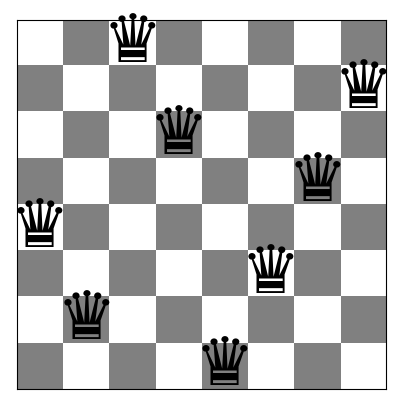

In [23]:
#Function test for 100 iteration for steepest_ascend_hill_climbing_search
def function_test_trial(board_size, n = 100):
    testing_board = random_board(board_size)
    best_board = testing_board
    min_conflict = conflicts(testing_board)
    i = 0
    while(i < n):
        testing_board, new_conflicts = steepest_ascend_hill_climbing_search(testing_board)
        if new_conflicts < min_conflict:
            min_conflict = new_conflicts
            best_board = testing_board
        i += 1
    
    show_board(best_board)

function_test_trial(8)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [24]:
# Code and description go here
import random

def stochastic_hill_climbing_search(board):
    current_board = board.copy()
    n = len(current_board)

    while True:
        current_conflicts = conflicts(current_board)
        #Membuat variabel min_conflicts yang akan digunakan untuk menyimpan konflik terkecil
        uphill_moves = []
        
        #iterasi tiap tiap langkah dalam loop untuk mencari solusi terbaik
        for col_move in range(n):
            for row_move in range(n):
                if current_board[col_move] == row_move:
                    continue
                temp = current_board.copy()
                temp[col_move] = row_move
                new_conflicts = conflicts(temp)
                
                #jika ada langkah yang lebih baik ditemukan, simpan langkah dan nilai konfliknya 
                if new_conflicts < current_conflicts:
                    # min_conflicts = new_conflicts
                    # best_move = (col_move, row_move)
                    uphill_moves.append((col_move, row_move))
        
        #kalau tidak ditemukan langkah yang lebih baik, hentikan loop (terjebak di local optima)
        if not uphill_moves:
            break
            
        else:
            col, row = random.choice(uphill_moves)
            current_board[col] = row

    return current_board, conflicts(current_board)


Board with 0 conflicts.


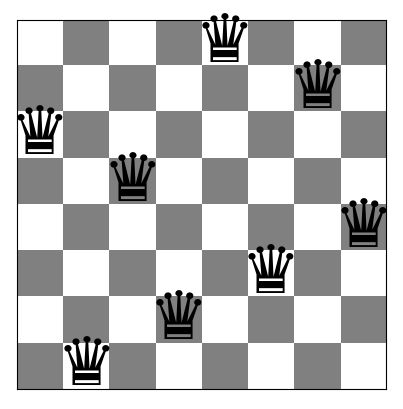

In [25]:
#
def stochastic_test_trial(board_size, n = 100):
    testing_board = random_board(board_size)
    best_board = testing_board
    min_conflict = conflicts(testing_board)
    i = 0
    while(i < n):
        testing_board, new_conflicts = stochastic_hill_climbing_search(testing_board)
        if new_conflicts < min_conflict:
            min_conflict = new_conflicts
            best_board = testing_board
        i += 1
    
    show_board(best_board)

stochastic_test_trial(8)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [26]:
# Code and description go here
def stochastic_hill_climbing_search_version2(board, max_tries = 100):
    current_board = board.copy()
    n = len(current_board)

    while True:
        current_conflicts = conflicts(current_board)
        improvement_found = False

        for i in range(max_tries):
            rand_col = random.randint(0, n - 1)
            rand_row = random.randint(0, n - 1)

            if current_board[rand_col] == rand_row:
                continue

            temp_board = current_board.copy()
            temp_board[rand_col] = rand_row
            new_conflicts = conflicts(temp_board)

            if new_conflicts < current_conflicts:
                current_board = temp_board
                improvement_found = True
                break

        if not improvement_found:
            break

    return current_board, conflicts(current_board)
    

Board with 0 conflicts.


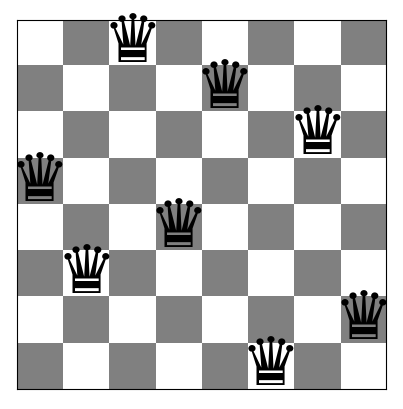

In [27]:
def stochastic_hill_climbing_search_version2_trial(board_size, n = 100):
    testing_board = random_board(board_size)
    best_board = testing_board
    min_conflict = conflicts(testing_board)
    i = 0
    while(i < n):
        testing_board, new_conflicts = stochastic_hill_climbing_search_version2(testing_board)
        if new_conflicts < min_conflict:
            min_conflict = new_conflicts
            best_board = testing_board
        i += 1
    
    show_board(best_board)

stochastic_hill_climbing_search_version2_trial(8)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [28]:
# Code and description go here
def random_restart_hill_climb(search_algorithm, board_size, num_restarts = 100):
    current_best_board = None
    current_best_conflict = float('inf')

    for i in range(num_restarts):
        initial_board = random_board(board_size)
        final_board, final_conflicts = search_algorithm(initial_board)

        if final_conflicts < current_best_conflict: 
            current_best_conflict = final_conflicts
            current_best_board = final_board
            print(f"Found a better solution at {i + 1} iteration with {current_best_conflict} conflict.")
        if current_best_conflict == 0:
            print(f"Optimal solution found at {i + 1} iteration")
            break
    
    return current_best_board, current_best_conflict


Found a better solution at 1 iteration with 1 conflict.
Found a better solution at 7 iteration with 0 conflict.
Optimal solution found at 7 iteration
Board with 0 conflicts.


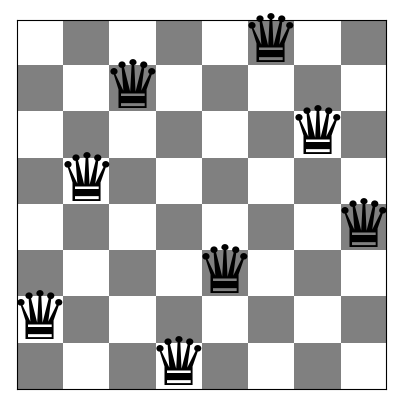

In [29]:
random_restart_board, random_restart_conflict = random_restart_hill_climb(first_choice_hill_climb, 8)
show_board(random_restart_board)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Total iteration: 1754
Hasil akhir: 0 konflik.
Board with 0 conflicts.


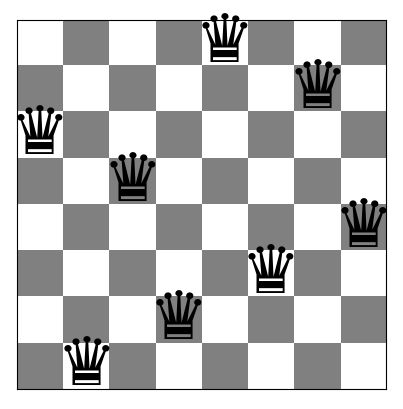

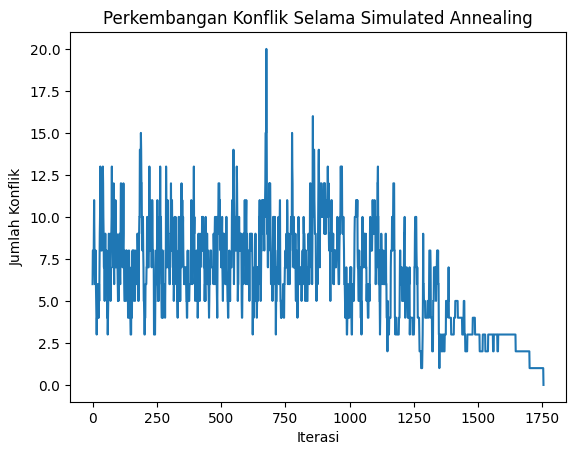

In [30]:
# Code and description go here
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(board, initial_temp, cooling_rate):
    current_board = board.copy()
    n = len(current_board)
    T = float(initial_temp)
    total_iteration = 0
    
    # Untuk visualisasi
    conflict_history = []

    while T > 0.001: # Loop sampai suhu sangat rendah
        current_conflicts = conflicts(current_board)
        conflict_history.append(current_conflicts)

        # Jika solusi sudah ditemukan, berhenti lebih awal
        if current_conflicts == 0:
            break

        # 1. Hasilkan satu tetangga acak
        rand_col = random.randint(0, n - 1)
        rand_row = random.randint(0, n - 1)
        
        # Buat papan sementara untuk dievaluasi
        next_board = current_board.copy()
        next_board[rand_col] = rand_row
        
        # 2. Hitung perubahan energi (konflik)
        next_conflicts = conflicts(next_board)
        delta_E = next_conflicts - current_conflicts

        # 3. Buat keputusan
        if delta_E < 0: # Jika langkahnya bagus, selalu terima
            current_board = next_board
        else:
            # Jika langkahnya buruk, terima dengan probabilitas tertentu
            acceptance_probability = np.exp(-delta_E / T)
            if random.random() < acceptance_probability:
                current_board = next_board
        
        # 4. Turunkan suhu
        T *= cooling_rate
        total_iteration += 1
    
    print(f"Total iteration: {total_iteration}")

    return current_board, conflicts(current_board), conflict_history

BOARD_SIZE = 8
INITIAL_TEMP = 1000
COOLING_RATE = 0.995

start_board = random_board(BOARD_SIZE)
final_board, final_conflicts, history = simulated_annealing(start_board, INITIAL_TEMP, COOLING_RATE)

print(f"Hasil akhir: {final_conflicts} konflik.")
show_board(final_board)

# Plotting
plt.plot(history)
plt.title('Perkembangan Konflik Selama Simulated Annealing')
plt.xlabel('Iterasi')
plt.ylabel('Jumlah Konflik')
plt.show()

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [31]:
# Code
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import pandas as pd

def run_comparison_experiment(algorithms, board_sizes, num_runs):
    print("--- Menjalankan Perbandingan Algoritma (Tugas 6.1) ---")
    results = []
    for name, func in algorithms.items():
        for size in board_sizes:
            print(f"Menguji {name} untuk papan ukuran {size}...")
            times, final_conflicts, successes = [], [], 0
            for _ in range(num_runs):
                start_board = random_board(size)
                start_time = time.time()
                _, final_c = func(start_board)
                end_time = time.time()
                times.append(end_time - start_time)
                final_conflicts.append(final_c)
                if final_c == 0: successes += 1
            avg_time = np.mean(times)
            avg_conflicts = np.mean(final_conflicts)
            success_rate = (successes / num_runs) * 100
            results.append([name, size, f"{avg_time:.6f}", f"{avg_conflicts:.2f}", f"{success_rate:.1f}%"])
    df = pd.DataFrame(results, columns=["Algorithm", "Board Size", "Avg. Run Time (s)", "Avg. Conflicts", "% Optimal Solution"])
    print("\n--- Hasil Perbandingan Algoritma ---")
    print(df.to_string(index=False))

def plot_convergence_analysis(algorithms, board_size):
    print(f"\n--- Membuat Plot Konvergensi untuk Papan {board_size}-Queens (Tugas 6.2) ---")
    plt.figure(figsize=(12, 8))
    initial_board = random_board(board_size) 
    for name, func in algorithms.items():
        _, _, history = func(initial_board)
        plt.plot(history, label=name)
    plt.title(f'Analisis Konvergensi pada Papan {board_size}-Queens')
    plt.xlabel('Iterasi')
    plt.ylabel('Jumlah Konflik')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_scalability_analysis(algorithms_to_scale, board_sizes, num_runs):
    print("\n--- Membuat Plot Skalabilitas (Tugas 6.3) ---")
    scale_results = {name: [] for name in algorithms_to_scale}
    for name, func in algorithms_to_scale.items():
        for size in board_sizes:
            print(f"Menguji skalabilitas {name} untuk papan ukuran {size}...")
            times = []
            for _ in range(num_runs):
                start_board = random_board(size)
                start_time = time.time()
                func(start_board)
                end_time = time.time()
                times.append(end_time - start_time)
            scale_results[name].append(np.mean(times))
    plt.figure(figsize=(10, 7))
    for name, runtimes in scale_results.items():
        plt.plot(board_sizes, runtimes, marker='o', linestyle='--', label=name)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Analisis Skalabilitas (Log-Log Plot)')
    plt.xlabel('Ukuran Papan (n)')
    plt.ylabel('Rata-rata Waktu Eksekusi (detik)')
    plt.xticks(board_sizes, labels=board_sizes)
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

def jalankan_semua_analisis_tugas6():
    all_algorithms = {
        "Steepest asc. HC": steepest_ascend_hill_climbing_search,
        "Stochastic HC 1": stochastic_hill_climbing_search,
        "Stochastic HC 2": stochastic_hill_climbing_search_version2,
        "Simulated Annealing": simulated_annealing
    }
    
    comparison_algos = {name: lambda b: func(b)[:2] for name, func in all_algorithms.items()}
    run_comparison_experiment(
        algorithms=comparison_algos,
        board_sizes=[4, 8],
        num_runs=100
    )

    plot_convergence_analysis(
        algorithms=all_algorithms,
        board_size=8
    )

    scaling_algos = {
        "Steepest asc. HC": lambda b: steepest_ascend_hill_climbing_search(b)[:2],
        "First-Choice HC": lambda b: stochastic_hill_climbing_search_version2(b)[:2]
    }
    plot_scalability_analysis(
        algorithms_to_scale=scaling_algos,
        board_sizes=[4, 8, 12, 16, 20],
        num_runs=20
    )

jalankan_semua_analisis_tugas6()


--- Menjalankan Perbandingan Algoritma (Tugas 6.1) ---
Menguji Steepest asc. HC untuk papan ukuran 4...


TypeError: simulated_annealing() missing 2 required positional arguments: 'initial_temp' and 'cooling_rate'

### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

In [ ]:
# Code and description go here

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

In [ ]:
# Code and description go here

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [ ]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [ ]:
# Code and description go here